In [1]:
'''Trains a Minimal RNN on the IMDB sentiment classification task.
The dataset is actually too small for Minimal RNN to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
'''
from __future__ import print_function
import os

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from ind_rnn import IndRNN

if not os.path.exists('weights'):
    os.makedirs('weights/')

max_features = 20000
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 128
top_words = 10000

In [2]:
import numpy as np
#x_train = np.array(x_train).reshape(len(x_train), -1)
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# restore np.load for future normal usage
np.load = np_load_old
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


17465344/17464789 [==============================] - 1s 0us/step
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_shape=(maxlen,)))
model.add(IndRNN(128, recurrent_clip_min=-1, recurrent_clip_max=-1, dropout=0.0, recurrent_dropout=0.0,
                 return_sequences=True))
model.add(IndRNN(128, recurrent_clip_min=-1, recurrent_clip_max=-1, dropout=0.0, recurrent_dropout=0.0,
                 return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

W0120 21:51:08.359481 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0120 21:51:08.383552 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0120 21:51:08.385812 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build model...


In [4]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


W0120 21:51:18.201834 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0120 21:51:18.228911 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0120 21:51:18.234204 140097820661568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

In [5]:
"""
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=[ModelCheckpoint('weights/imdb_indrnn.h5', monitor='val_acc',
                                     save_best_only=True, save_weights_only=True)]) """


hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)



W0120 21:51:35.190767 140097820661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 141s 6ms/step - loss: 0.3831 - acc: 0.8188 - val_loss: 0.2858 - val_acc: 0.8804
Epoch 2/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.1795 - acc: 0.9329 - val_loss: 0.3095 - val_acc: 0.8734
Epoch 3/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.1110 - acc: 0.9602 - val_loss: 0.3847 - val_acc: 0.8671
Epoch 4/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.0677 - acc: 0.9768 - val_loss: 0.4549 - val_acc: 0.8692
Epoch 5/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.0384 - acc: 0.9878 - val_loss: 0.5961 - val_acc: 0.8631
Epoch 6/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.6678 - val_acc: 0.8620
Epoch 7/50
25000/25000 [==============================] - 138s 6ms/step - loss: 0.0133 - acc: 0.9961 - val_loss: 0.8113 - 

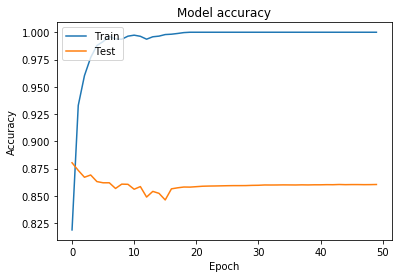

In [8]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



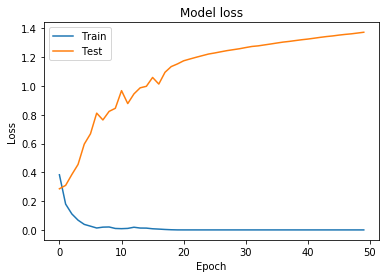

In [9]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.04%
